In [1]:
# Dataset HY_Universe_Corporate Bond used

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pylab
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
# Import data

f = open('E:\大学相关\硕士相关\IE517\Module 3\HY_Universe_corporate bond.csv')
HY = pd.read_csv(f)
HY

,CUSIP,Ticker,Issue Date,Maturity,1st Call Date,Moodys,S_and_P,Fitch,Bloomberg Composite Rating,Coupon,...,percent_intra_dealer,percent_uncapped,bond_type,Client_Trade_Percentage,weekly_mean_volume,weekly_median_volume,weekly_max_volume,weekly_min_volume,weekly_mean_ntrades,weekly_median_ntrades
0,000324AA1,FLECIN,7/1/2014,7/1/2019,10/23/2017,Nan,Nan,Nan,Nan,12.00,...,0.006645,0.292359,5,0.521595,3.105927e+06,2000000.00,18980000.0,60000.00,3.541176,1
1,00080QAB1,RBS,3/15/2004,6/4/2018,Nan,Ba1,BB+,BBB,BB+,4.65,...,0.425018,0.974071,2,0.337071,1.721697e+06,1160000.00,11197000.0,5000.00,18.412903,3
2,00081TAD0,ACCO,5/14/2010,3/15/2015,Nan,WR,NR,BB+,NR,10.63,...,0.115207,0.594470,5,0.467742,4.200313e+06,3520000.00,14000000.0,24000.00,6.477612,1
3,00081TAH1,ACCO,6/17/2013,4/30/2020,Nan,WR,NR,WD,NR,6.75,...,0.426332,0.892462,3,0.212864,6.321560e+06,5487500.00,18459000.0,30000.00,27.038043,1
4,00081TAJ7,ACCO,12/22/2016,12/15/2024,12/15/2019,B1,BB-,BB,BB-,5.25,...,0.157216,0.690722,5,0.500000,5.936714e+06,3305500.00,72760000.0,90000.00,9.238095,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2716,629377CC4,NRG,4/18/2017,1/15/2027,7/15/2021,B1,BB-,Nan,B+,6.63,...,0.376000,0.708571,1,0.243429,1.673926e+07,13167000.00,65036000.0,1475000.00,38.043478,4
2717,62940QAA3,NSGHLD,3/14/2007,12/15/2025,Nan,Ba1,BB+,Nan,BB+,7.75,...,0.024540,0.699387,5,0.460123,1.787675e+06,937286.96,12500000.0,93728.69,3.075472,1
2718,62941FAH1,VMED,7/25/2006,8/15/2016,Nan,WR,NR,BB+,NR,9.13,...,0.193798,0.527132,5,0.449612,6.440966e+06,5468000.00,18280000.0,1000000.00,8.896552,1
2719,62943WAA7,NYLD,8/5/2014,8/15/2024,Nan,Ba2,BB,Nan,BB,5.38,...,0.063197,0.605948,3,0.434944,3.923217e+06,3022500.00,16100000.0,25000.00,5.847826,1


In [4]:
# Prepocessing
# Find missing value

print(HY.isna().sum())

CUSIP                         0
Ticker                        0
Issue Date                    0
Maturity                      0
1st Call Date                 0
Moodys                        0
S_and_P                       0
Fitch                         0
Bloomberg Composite Rating    0
Coupon                        0
Issued Amount                 0
Maturity Type                 0
Coupon Type                   0
Maturity At Issue months      0
Industry                      0
LiquidityScore                0
Months in JNK                 0
Months in HYG                 0
Months in Both                0
IN_ETF                        0
LIQ SCORE                     0
n_trades                      0
volume_trades                 0
total_median_size             0
total_mean_size               0
n_days_trade                  0
days_diff_max                 0
percent_intra_dealer          0
percent_uncapped              0
bond_type                     0
Client_Trade_Percentage       0
weekly_m

In [5]:
# Deal with Nan
# Find columns contain Nan

for col in HY.columns:
    if 'Nan' in HY[col].tolist():
        print(col)

1st Call Date
Moodys
S_and_P
Fitch
Bloomberg Composite Rating
Months in JNK
Months in HYG
Months in Both


In [6]:
# Delete Nan

HY_pro = HY
for col in HY_pro:
    HY_pro = HY_pro[-HY_pro[col].isin(['Nan'])]
HY_pro

,CUSIP,Ticker,Issue Date,Maturity,1st Call Date,Moodys,S_and_P,Fitch,Bloomberg Composite Rating,Coupon,...,percent_intra_dealer,percent_uncapped,bond_type,Client_Trade_Percentage,weekly_mean_volume,weekly_median_volume,weekly_max_volume,weekly_min_volume,weekly_mean_ntrades,weekly_median_ntrades
22,00130HBS3,AES,8/1/2012,7/1/2021,6/1/2021,Ba2,BB,BB,BB,7.38,...,0.309374,0.791453,1,0.363135,7.585082e+06,6374500.0,30366000.0,5000.0,18.947761,1
23,00130HBT1,AES,4/30/2013,5/15/2023,5/15/2018,Ba2,BB,BB,BB,4.88,...,0.340488,0.852679,1,0.244677,7.117121e+06,5446000.0,97500000.0,60000.0,25.212121,2
24,00130HBU8,AES,3/7/2014,3/15/2024,3/15/2019,Ba2,BB,BB,BB,5.50,...,0.354534,0.835642,1,0.324307,7.704124e+06,5978000.0,116644000.0,140000.0,25.612903,1
26,00130HBW4,AES,4/6/2015,4/15/2025,4/15/2020,Ba2,BB,BB,BB,5.50,...,0.324896,0.830374,1,0.363808,5.979177e+06,4452000.0,51280000.0,80000.0,20.361538,2
27,00130HBX2,AES,5/25/2016,5/15/2026,5/15/2021,Ba2,BB,BB,BB,6.00,...,0.292940,0.765016,1,0.323498,5.515944e+06,4112500.0,56750000.0,63000.0,13.180556,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2692,62913TAE2,NGL,2/10/2015,7/15/2019,6/15/2019,B2,B+,B,B,5.13,...,0.439719,0.886071,2,0.221615,4.178433e+06,3493500.0,18149000.0,30000.0,19.126866,1
2693,62913TAH5,NGL,10/24/2016,11/1/2023,11/1/2019,B2,B+,B,B,7.50,...,0.196302,0.625889,1,0.452347,1.102370e+07,6640000.0,134070000.0,50000.0,16.348837,1
2695,62913TAL6,NGL,2/22/2017,3/1/2025,3/1/2020,B2,B+,B,B,6.13,...,0.246753,0.493506,1,0.444805,8.846423e+06,3431500.0,71000000.0,55000.0,11.846154,1
2707,629377BS0,NRG,2/21/2012,5/15/2021,10/16/2017,B1,BB-,WD,B+,7.88,...,0.334536,0.874882,1,0.323193,9.737653e+06,7328000.0,74855000.0,110000.0,39.989691,1


In [7]:
# We find the delete of Nan will lose information from 2721 rows to 203 rows
# We need use the dataset before cleaning and avoid Nan in another way

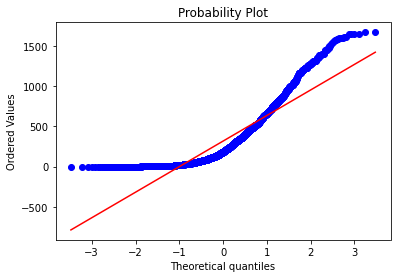

In [8]:
# No.1 QQ-plot

scipy.stats.probplot(HY['n_days_trade'], dist = 'norm', plot = pylab)
pylab.show()

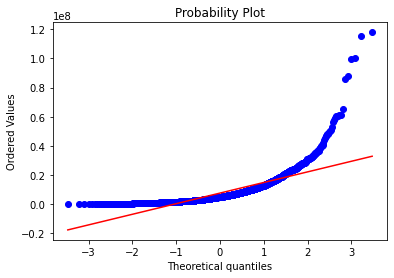

In [9]:
scipy.stats.probplot(HY['weekly_mean_volume'], dist = 'norm', plot = pylab)
pylab.show()

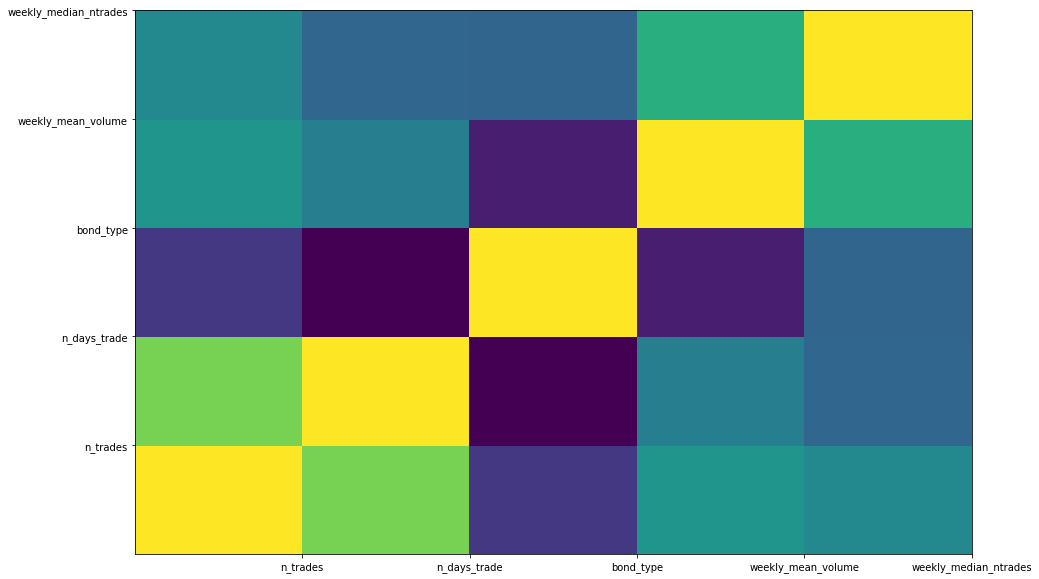

In [10]:
# No.2 Heatmap

# Standardization
X = HY.iloc[:, [21, 25, 29, 31, 36]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled)

# Draw Heatmap
plt.figure(figsize = (15, 10))
corMat = pd.DataFrame(X_scaled_df.corr())
corMat.index = ['n_trades', 'n_days_trade', 'bond_type', 'weekly_mean_volume','weekly_median_ntrades']
corMat.columns = ['n_trades', 'n_days_trade', 'bond_type', 'weekly_mean_volume','weekly_median_ntrades']
plt.xticks(range(1, 6, 1), ['n_trades', 'n_days_trade', 'bond_type', 'weekly_mean_volume','weekly_median_ntrades'])
plt.yticks(range(1, 6, 1), ['n_trades', 'n_days_trade', 'bond_type', 'weekly_mean_volume','weekly_median_ntrades'])

plt.pcolor(corMat)
plt.show()


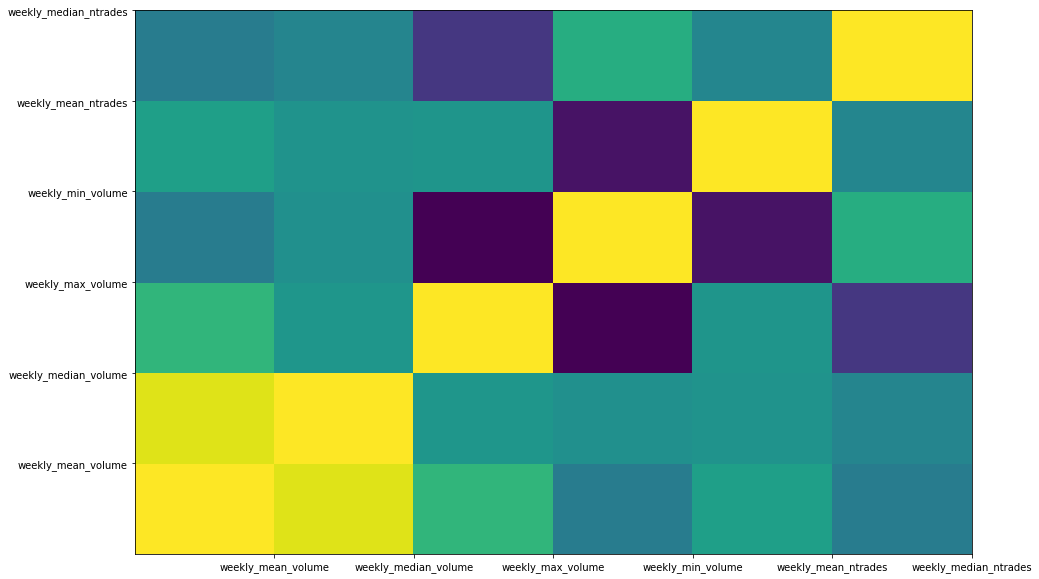

In [11]:
# Standardization
X = HY.iloc[:, [31, 32, 33, 34, 35, 36]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled)

# Draw Heatmap
plt.figure(figsize = (15, 10))
corMat = pd.DataFrame(X_scaled_df.corr())
corMat.index = ['weekly_mean_volume', 'weekly_median_volume', 'weekly_max_volume', 'weekly_min_volume', 'weekly_mean_ntrades', 'weekly_median_ntrades']
corMat.columns = ['weekly_mean_volume', 'weekly_median_volume', 'weekly_max_volume', 'weekly_min_volume', 'weekly_mean_ntrades', 'weekly_median_ntrades']
plt.xticks(range(1, 7, 1), ['weekly_mean_volume', 'weekly_median_volume', 'weekly_max_volume', 'weekly_min_volume', 'weekly_mean_ntrades', 'weekly_median_ntrades'])
plt.yticks(range(1, 7, 1), ['weekly_mean_volume', 'weekly_median_volume', 'weekly_max_volume', 'weekly_min_volume', 'weekly_mean_ntrades', 'weekly_median_ntrades'])

plt.pcolor(corMat)
plt.show()

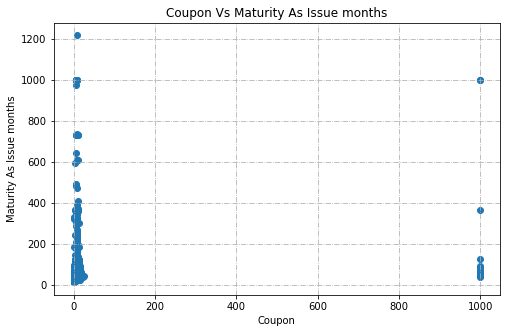

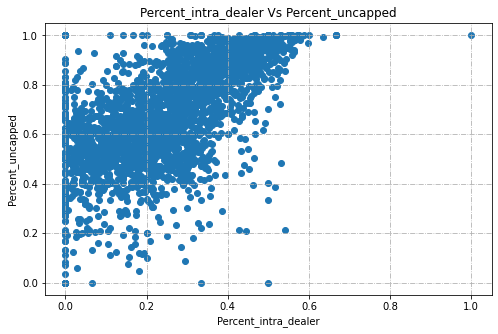

In [12]:
# No.3 Scatter Plot

plt.figure(figsize = (8, 5))
plt.grid(True, linestyle = '-.')
plt.xlabel('Coupon')
plt.ylabel('Maturity As Issue months')
plt.title('Coupon Vs Maturity As Issue months')
plt.scatter(HY['Coupon'], HY['Maturity At Issue months'])
plt.show()

plt.figure(figsize = (8, 5))
plt.grid(True, linestyle = '-.')
plt.xlabel('Percent_intra_dealer')
plt.ylabel('Percent_uncapped')
plt.title('Percent_intra_dealer Vs Percent_uncapped')
plt.scatter(HY['percent_intra_dealer'], HY['percent_uncapped'])
plt.show()

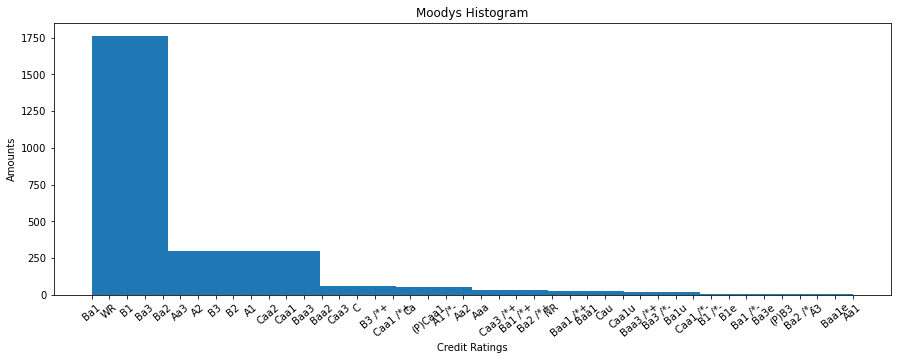

In [13]:
# No.4 Histogram

# Clean data
moodys_pro = HY['Moodys'][-HY['Moodys'].isin(['Nan'])]

plt.figure(figsize = (15, 5))
plt.xlabel('Credit Ratings')
plt.ylabel('Amounts')
plt.title('Moodys Histogram')
plt.xticks(fontsize = 10, rotation = 40)
plt.hist(moodys_pro)
plt.show()

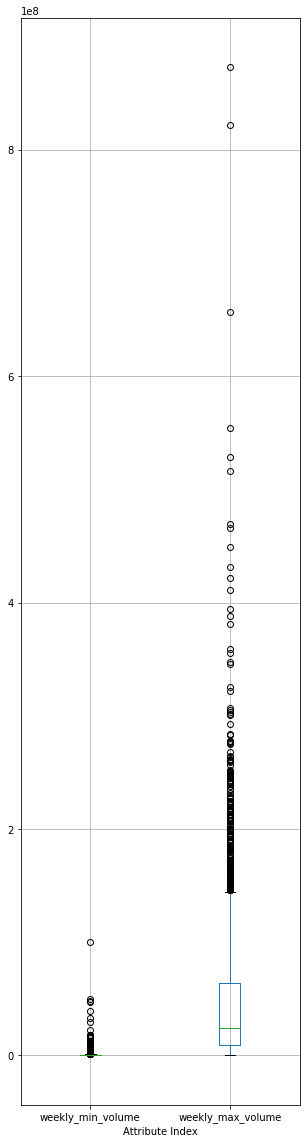

In [14]:
# No.5 Boxplot

plt.figure(figsize = (5, 20))
HY_tmp = pd.DataFrame(HY[{'weekly_max_volume', 'weekly_min_volume'}])
f = HY_tmp.boxplot()
plt.xlabel("Attribute Index")
plt.show()


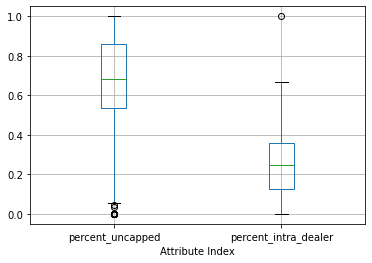

In [15]:
HY_tmp = pd.DataFrame(HY[{'percent_intra_dealer', 'percent_uncapped'}])
f = HY_tmp.boxplot()
plt.xlabel("Attribute Index")
plt.show()